# Description
A python notebook made to compare data (Rays) gathered from old RAY-UI and new RAY-X to check for correctness or possible deviations. 

Please do note the used paths. 

_by Oussama Sayari_

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get old and new output
Filters added with shape output.

In [74]:
old_df = pd.read_csv('oldray_files/ImagePlane-RawRaysBeam.csv',sep=';')
new_df = pd.read_csv('output/output.csv',sep=';')
old_df = old_df[['ImagePlane_RN','ImagePlane_OX','ImagePlane_OY','ImagePlane_OZ','ImagePlane_DX','ImagePlane_DY','ImagePlane_DZ']]
new_df = new_df[['Index','Xloc','Yloc','Zloc','Xdir','Ydir','Zdir','Weight']]
new_df = new_df[new_df['Weight'] == 1] # Filter only encountered rays.
print("Old data-frame: ", old_df.shape)
print("New data-frame: ", new_df.shape)   
if (old_df.shape != new_df.shape):
    print("Shape!")

Old data-frame:  (400000, 7)
New data-frame:  (400000, 8)
Shape!


# Plot Scatter (Normal)
Data scatter (Footprint) plot with axes. And additional data stats

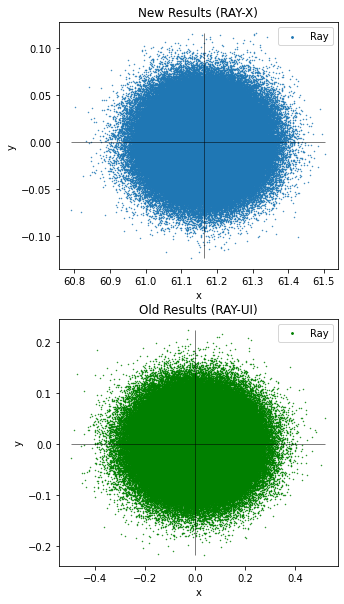

Data Summary:
Old:
X: 	 std:  0.10899382175860767  ,mean:  1.8484759055033984e-05
	 std/mean:  5896.41560564054
Y: 	 std:  0.04826524379203385  ,mean:  -7.007791655141761e-05
	 std/mean:  -688.7368541646161
New
X: 	 std:  0.07612301011876733  ,mean:  61.16253453390453
	 std/mean:  0.0012446019560646182
Y: 	 std:  0.027040563823286574  ,mean:  3.275342855132678e-05
	 std/mean:  825.5796421712686


In [75]:
f = plt.figure(figsize=(5,10))
plt.subplot(2,1,1)
plt.scatter(new_df['Xloc'],new_df['Yloc'],s=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('New Results (RAY-X)')
plt.legend(['Ray'],markerscale=4)
plt.hlines(y=0,xmin=new_df['Xloc'].min(),xmax=new_df['Xloc'].max(),color='black',linewidth=0.5)
plt.vlines(x=new_df['Xloc'].mean(), ymin=new_df['Yloc'].min(),ymax=new_df['Yloc'].max(),color='black',linewidth=0.5)
plt.subplot(2,1,2)
plt.scatter(old_df['ImagePlane_OX'],old_df['ImagePlane_OY'],s=0.2,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Old Results (RAY-UI)')
plt.legend(['Ray'],markerscale=4)
plt.hlines(y=0,xmin=old_df['ImagePlane_OX'].min(),xmax=old_df['ImagePlane_OX'].max(),color='black',linewidth=0.5)
plt.vlines(x=old_df['ImagePlane_OX'].mean(), ymin=old_df['ImagePlane_OY'].min(),ymax=old_df['ImagePlane_OY'].max(),color='black',linewidth=0.5)
plt.show()

print("Data Summary:")
print("Old:")
print("X: \t std: ", old_df['ImagePlane_OX'].std(), " ,mean: ",old_df['ImagePlane_OX'].mean())
print("\t std/mean: ", old_df['ImagePlane_OX'].std()/old_df['ImagePlane_OX'].mean())
print("Y: \t std: ", old_df['ImagePlane_OY'].std(), " ,mean: ",old_df['ImagePlane_OY'].mean())
print("\t std/mean: ", old_df['ImagePlane_OY'].std()/old_df['ImagePlane_OY'].mean())

print("New")
print("X: \t std: ", new_df['Xloc'].std(), " ,mean: ",new_df['Xloc'].mean())
print("\t std/mean: ", new_df['Xloc'].std()/new_df['Xloc'].mean())
print("Y: \t std: ", new_df['Yloc'].std(), " ,mean: ",new_df['Yloc'].mean())
print("\t std/mean: ", new_df['Yloc'].std()/new_df['Yloc'].mean())

# Data Compare and precision
Additonal filtering and comparision.

Output = AVG(NEW-OLD)

In [76]:
old_df.set_index('ImagePlane_RN',inplace=True) #= old_df['ImagePlane_RN']
new_df.set_index('Index',inplace=True)

i=0
for col in new_df.columns[:6]:
    old_df = old_df.rename(columns={old_df.columns[i]:col})
    i += 1
comp_df = new_df.drop(columns='Weight')- old_df
mean_comp_df['Xloc']
mean_comp_df = comp_df[comp_df.columns].mean()
mean_comp_df.head()
#comp_df = pd.DataFrame(old_df.index == new_df.index)

#idx = new_df['Index'].intersection(old_df['ImagePlane_RN'])
#print(idx)

Xloc    6.116252e+01
Yloc    1.028313e-04
Zloc    0.000000e+00
Xdir    6.104865e-02
Ydir   -2.621195e-08
dtype: float64

# Data distribution 

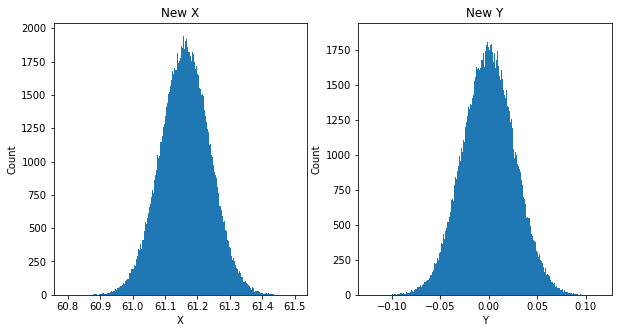

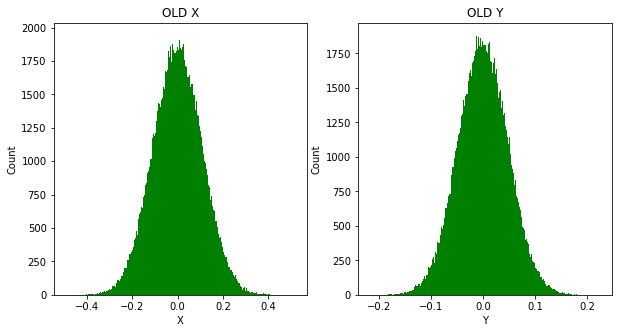

In [77]:

f = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(new_df['Xloc'],bins=(int(new_df['Xloc'].count()/500)))
plt.xlabel("X")
plt.ylabel("Count")
plt.title("New X")
plt.subplot(1,2,2)
plt.hist(new_df['Yloc'],bins=(int(new_df['Yloc'].count()/500)))
plt.title("New Y")
plt.xlabel("Y")
plt.ylabel("Count")
plt.show()

f = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(old_df['Xloc'],bins=(int(old_df['Xloc'].count()/500)),color='Green')
plt.xlabel("X")
plt.ylabel("Count")
plt.title("OLD X")
plt.subplot(1,2,2)
plt.hist(old_df['Yloc'],bins=(int(old_df['Yloc'].count()/500)),color='Green')
plt.title("OLD Y")
plt.xlabel("Y")
plt.ylabel("Count")
plt.show()

# With scaling (Standarization)
Scaling is trying to make all units "look the same or have a universal length" to be compared.

__Formula:__

Scaled_Data = (Data - Data.mean)/Data.StandardDeviation

KeyError: 'ImagePlane_OX'

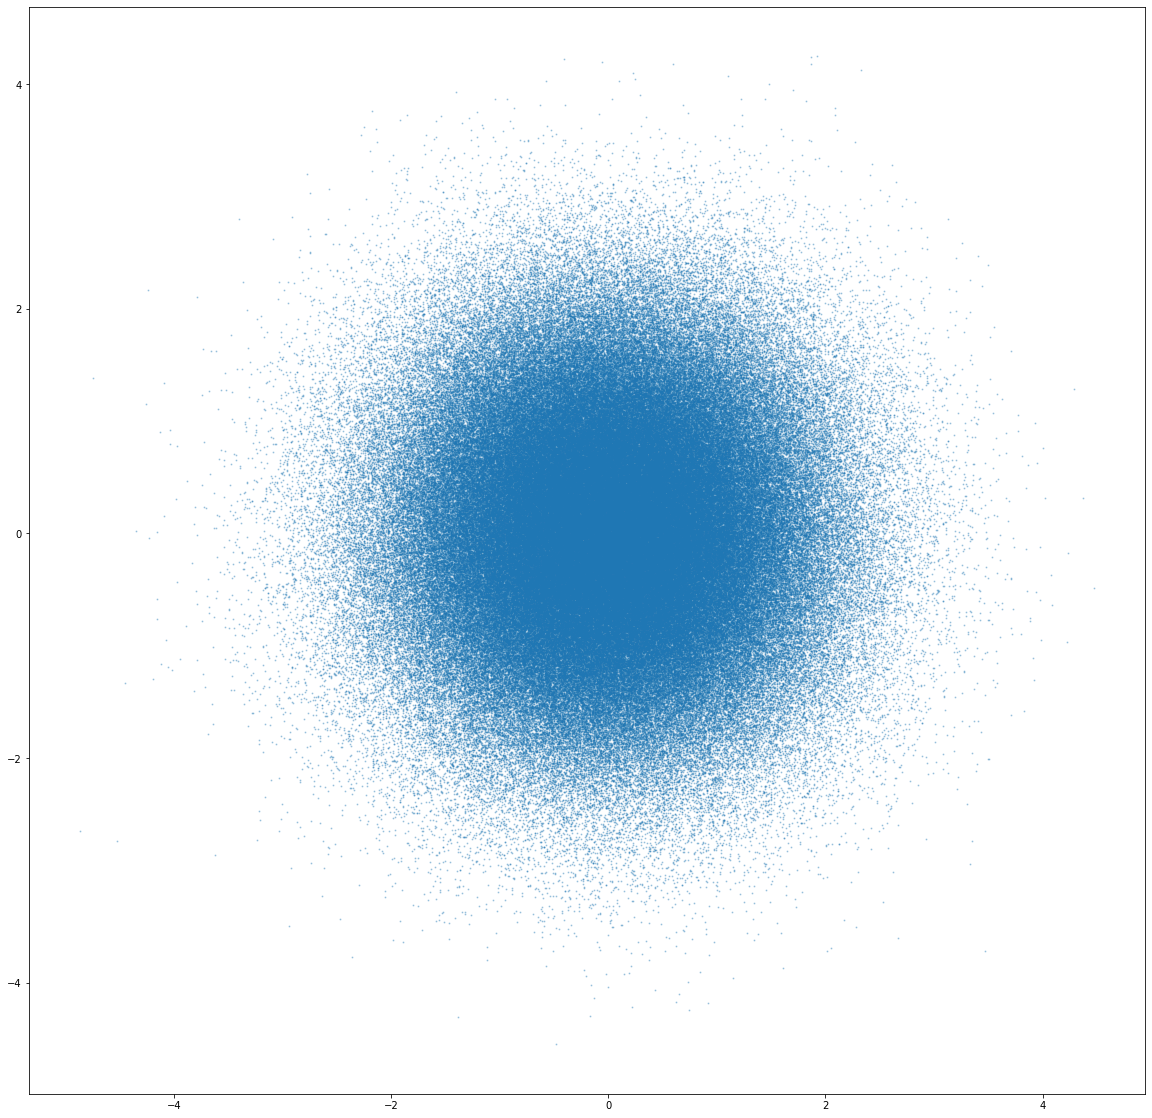

In [78]:
from sklearn.preprocessing import StandardScaler

# Scale
scale = StandardScaler()
old_df_scaled = scale.fit_transform(old_df)
new_df_scaled = scale.fit_transform(new_df)
old_df_scaled = pd.DataFrame(old_df_scaled,columns=old_df.columns)
new_df_scaled = pd.DataFrame(new_df_scaled,columns=new_df.columns)


# Plot
f = plt.figure(figsize=(20, 20))
plt.scatter(new_df_scaled['Xloc'], new_df_scaled['Yloc'], s=1,alpha=0.3)
plt.scatter(old_df_scaled['ImagePlane_OX'],
            old_df_scaled['ImagePlane_OY'], s=1, color='lightcoral',alpha=0.3)

plt.hlines(y=0,xmin=new_df_scaled['Xloc'].min(),xmax=new_df_scaled['Xloc'].max(),color='brown',linewidth=2,alpha=0.5)
plt.vlines(x=new_df_scaled['Xloc'].mean(), ymin=new_df_scaled['Yloc'].min(),ymax=new_df_scaled['Yloc'].max(),color='brown',linewidth=2,alpha=0.5)

plt.hlines(y=0,xmin=old_df_scaled['ImagePlane_OX'].min(),xmax=old_df_scaled['ImagePlane_OX'].max(),color='cyan',linewidth=2,alpha=0.5)
plt.vlines(x=old_df_scaled['ImagePlane_OX'].mean(), ymin=old_df_scaled['ImagePlane_OY'].min(),ymax=old_df_scaled['ImagePlane_OY'].max(),color='cyan',linewidth=2,alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Old Results (RAY-UI) vs New Results (RAY-X)')
plt.legend(['Ray UI', 'Ray X'], markerscale=4)
plt.show()

#save
#f.savefig('plots/scaled_overlapped_rays.png')
